# Fuzzy Logic usando scikit-fuzzy

https://github.com/scikit-fuzzy/scikit-fuzzy

## Instalación

In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=8bfe3a35efb0e0767b7f34322e0ab4cc59dfd2c2075848aad2aa20521167c16e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


## Paquetes básicos para uso de skfuzzy

Importamos 3 paquetes distintos:
* **numpy**: crear rangos numéricos para inicializar las variables de entrada/salida
* **skfuzzy**: librería básica para trabajar con lógica difusa (crear funciones de membresía)
* **control**: módulo para crear reglas, el sistema principal y antecedentes y consecuentes 

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Definición de variables de entrada y salida

* Para definir variables de entrada: Antecedent.
* Para definir variables de salida: Consequent.

En nuestro caso tenemos dos antecedentes y un consecuente, creados los tres con su correspondiente rango de valores.

* **edad**: rango de 0 a 100, de 1 en 1.
* **ingreso**: rango de 0 a 100000, de 1 en 1.
* **felicidad**: rango de 0 a 10, de 1 en 1.

In [ ]:
# Definir las variables de entrada y salida
edad = ctrl.Antecedent(np.arange(0, 101, 1), 'edad')
ingreso = ctrl.Antecedent(np.arange(0, 100001, 1), 'ingreso')
felicidad = ctrl.Consequent(np.arange(0, 11, 1), 'felicidad')

## Definición de funciones de membresía
Dichas funciones establecen los rangos en los que se va a mover cada uno de los valores difusos.

La propiedad `universe` contiene un array con todos los posibles valores de cada una de las variables de entrada y salida.

En este caso estamos utilizando una función de membresía triangular llamada `trimf`, por lo que debemos indicar los tres vértices de nuestro triángulo mediante el segundo parámetro. Un ejemplo es `[0, 50, 100]`, en el que establecemos que nuestro origen es 0, el vértice intermedio es el 50 y el último vértice es el 100.

Por ejemplo, definimos una función de membresía para `edad` llamada `joven`, otra llamada `mediana` y otra llamada `vieja`, cada una con sus coordenadas triangulares correspondientes. 

In [ ]:
# Definir las funciones de membresía
edad['joven'] = fuzz.trimf(edad.universe, [0, 0, 50])
edad['mediana'] = fuzz.trimf(edad.universe, [0, 50, 100])
edad['vieja'] = fuzz.trimf(edad.universe, [50, 100, 100])

ingreso['bajo'] = fuzz.trimf(ingreso.universe, [0, 0, 50000])
ingreso['medio'] = fuzz.trimf(ingreso.universe, [0, 50000, 100000])
ingreso['alto'] = fuzz.trimf(ingreso.universe, [50000, 100000, 100000])

felicidad['muy_bajo'] = fuzz.trimf(felicidad.universe, [0, 0, 3])
felicidad['bajo'] = fuzz.trimf(felicidad.universe, [0, 3, 5])
felicidad['medio'] = fuzz.trimf(felicidad.universe, [3, 5, 7])
felicidad['alto'] = fuzz.trimf(felicidad.universe, [5, 7, 9])
felicidad['muy_alto'] = fuzz.trimf(felicidad.universe, [7, 10, 10])

## Definición de reglas

Como siguiente paso creamos las reglas básicas usadas por nuestro motor de inferencia (Fuzzy Inference Engine).

Las reglas están compuestas por dos partes:
* Condiciones: relacionadas con edad e ingreso en este caso.
* Consecuencias: relacionadas con felicidad.

In [ ]:
# Definir las reglas
regla1 = ctrl.Rule(edad['joven'] & ingreso['bajo'], felicidad['bajo'])
regla2 = ctrl.Rule(edad['joven'] & ingreso['medio'], felicidad['medio'])
regla3 = ctrl.Rule(edad['joven'] & ingreso['alto'], felicidad['alto'])
regla4 = ctrl.Rule(edad['mediana'] & ingreso['bajo'], felicidad['muy_bajo'])
regla5 = ctrl.Rule(edad['mediana'] & ingreso['medio'], felicidad['medio'])
regla6 = ctrl.Rule(edad['mediana'] & ingreso['alto'], felicidad['alto'])
regla7 = ctrl.Rule(edad['vieja'] & ingreso['bajo'], felicidad['muy_bajo'])
regla8 = ctrl.Rule(edad['vieja'] & ingreso['medio'], felicidad['bajo'])
regla9 = ctrl.Rule(edad['vieja'] & ingreso['alto'], felicidad['medio'])

## Definición y ejecución del sistema de control

Creamos un `ControlSystemSimulation` a partir de las reglas anteriormente creadas. 

Utilizamos una entrada con `edad = 30` e `ingreso = 60000`, para después llamar al método compute del `ControlSystemSimulation`.

Otra forma de crear los inputs sería utilizar la propiedad `inputs`, indicando un diccionario.

In [ ]:
# Definir el sistema de control
sistema_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9])
sistema = ctrl.ControlSystemSimulation(sistema_ctrl)

sistema.input['edad'] = 30
sistema.input['ingreso'] = 60000

sistema.compute()

## Resultados

Podemos obtener el valor de `output` obtenido con la entrada indicada, así como mostrar la representación del sistema de forma gráfica utilizando `view`.

5.566355140186916


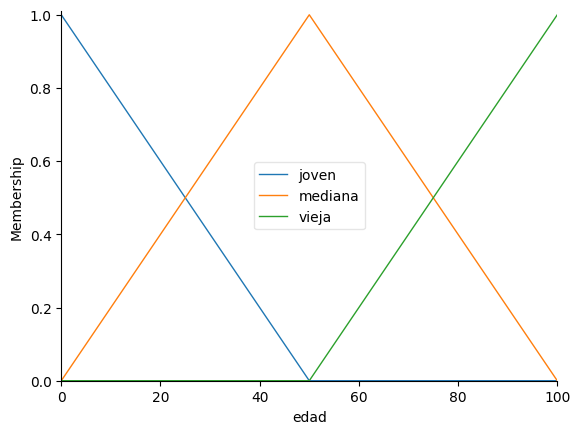

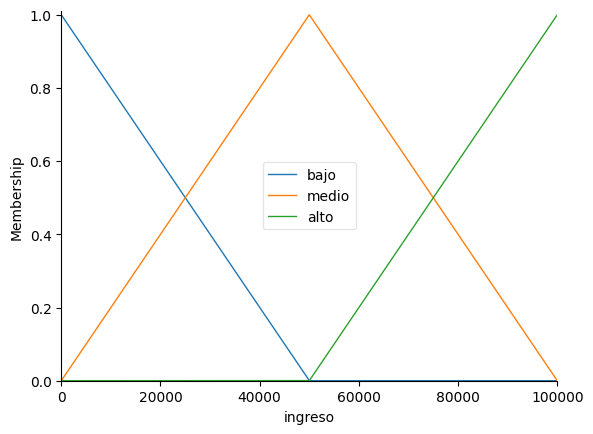

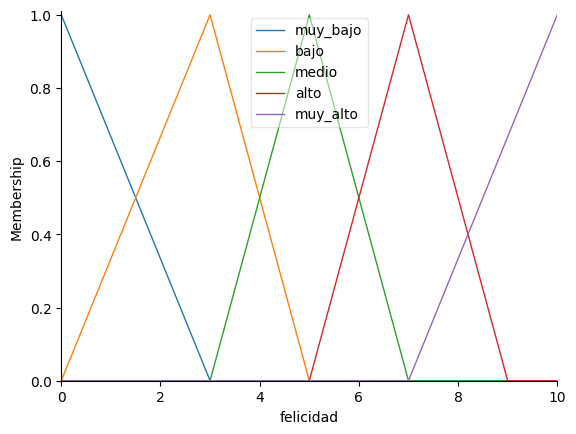

In [ ]:
print(sistema.output['felicidad'])

edad.view()
ingreso.view()
felicidad.view()